In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import pickle
from scipy.optimize import curve_fit
from matplotlib.backends.backend_pdf import PdfPages
from scipy.signal import lombscargle as lbsc
from astropy.timeseries import LombScargle

In [2]:
with open('time.dat', 'r') as file:
    lineas = file.readlines()
time = np.zeros(len(lineas))
for i in range(len(lineas)):
    time[i] = float(lineas[i].strip())

In [3]:
#Abre el archivo master.raw (el primero de cuatro) y luego los divide en listas de estrellas
with open('master.raw', 'r') as file:
    # Lee todas las líneas del archivo
    lines = file.readlines()
match1 = []
valores = []
for i, line in tqdm(enumerate(lines)):
    # Usa split para dividir la línea en palabras
    valores.extend([float(word) for word in line.split()])
    # Verifica si ha leído 36 líneas
    if (i + 1) % 36 == 0:
        del valores[-2:]
        match1.append(valores)
        valores = []

578016it [00:03, 148855.12it/s]


In [7]:
with open('master2.raw', 'r') as file:
    # Lee todas las líneas del archivo
    lines = file.readlines()
match2 = []
valores = []
for i, line in tqdm(enumerate(lines)):
    # Usa split para dividir la línea en palabras
    valores.extend([float(word) for word in line.split()])

    # Verifica si hemos leído 36 líneas
    if (i + 1) % 36 == 0:
        del valores[-2:]
        del valores[3:5]
        # Imprime la lista de palabras para esta iteración
        # Reinicia la lista de palabras para la próxima iteración
        match2.append(valores)
        valores = []

479304it [00:03, 150268.83it/s]


In [8]:
with open('master3.raw', 'r') as file:
    # Lee todas las líneas del archivo
    lines = file.readlines()
match3 = []
valores = []
for i, line in tqdm(enumerate(lines)):
    # Usa split para dividir la línea en palabras
    valores.extend([float(word) for word in line.split()])

    # Verifica si hemos leído 36 líneas
    if (i + 1) % 36 == 0:
        del valores[-2:]
        del valores[3:5]
        # Imprime la lista de palabras para esta iteración
        # Reinicia la lista de palabras para la próxima iteración
        match3.append(valores)
        valores = []

433620it [00:02, 161508.65it/s]


In [9]:
with open('master4.raw', 'r') as file:
    # Lee todas las líneas del archivo
    lines = file.readlines()
match4 = []
valores = []
for i, line in tqdm(enumerate(lines)):
    # Usa split para dividir la línea en palabras
    valores.extend([float(word) for word in line.split()])

    # Verifica si hemos leído 36 líneas
    if (i + 1) % 37 == 0:
        del valores[-2:]
        del valores[3:5]
        # Imprime la lista de palabras para esta iteración
        # Reinicia la lista de palabras para la próxima iteración
        match4.append(valores)
        valores = []

349428it [00:02, 154317.88it/s]


In [11]:
#Función para unir los 4 archivos
def unir(mch1, mch2):
    mch3 = []
    for i in tqdm(range(len(mch1))):
        if mch1[i][0] < 200000:
            for j in range(len(mch2)):
                if mch1[i][0] == mch2[j][0]:
                    mch3.append(mch1[i] + mch2[j][3:])
    return mch3
mch1 = unir(match1, match2)
mch2 = unir(mch1, match3)
master = unir(mch2, match4)

100%|████████████████████████████████████| 10565/10565 [00:55<00:00, 191.34it/s]


In [12]:
#guarda la lista como un objeto .pickle
with open("master.pickle", "wb") as f:
    pickle.dump(master, f)

In [5]:
with open("master.pickle", "rb") as f:
    master = pickle.load(f)

In [6]:
#obtiene los ids de acuerdo a la imagen máster
ids = []
for i in tqdm(range(len(master))):
    ids.append(master[i][0])

100%|███████████████████████████████████| 8618/8618 [00:00<00:00, 652723.32it/s]


In [7]:
#Divide entre magnitudes y errores para cada lista.
def getmag(master):
    mag = []
    merr = []
    for i in tqdm(range(len(master))):
        mast = master[i][3:]
        mag2 = []
        merr2 = []
        for j in range(len(mast)):
            if (j+2)%2==0:
                mag2.append(mast[j])
            else:
                merr2.append(mast[j])
        mag.append(np.array(mag2))
        merr.append(np.array(merr2))
    return mag, merr
mag, merr = getmag(master)

100%|█████████████████████████████████████| 8618/8618 [00:03<00:00, 2386.05it/s]


In [8]:
for i in tqdm(range(len(mag))):
    mag[i][mag[i]==99.9999] = np.nan
    merr[i][merr[i]==9.9999] = np.nan

100%|████████████████████████████████████| 8618/8618 [00:00<00:00, 17990.45it/s]


In [9]:
with open("magMaster.pickle", "wb") as f:
    pickle.dump(mag, f)
with open("merrMaster.pickle", "wb") as f:
    pickle.dump(master, f)

In [3]:
with open("magMaster.pickle", "rb") as f:
    mag = pickle.load(f)
with open("merrMaster.pickle", "rb") as f:
    merr = pickle.load(f)

In [10]:
magt = []
merrt = []
idt = []
for i in tqdm(range(len(mag))):
    len_sin_nan = np.count_nonzero(~np.isnan(mag))
    if len_sin_nan > 63:
        magt.append(mag[i])
        merrt.append(merr[i])
        idt.append(ids[i])        

100%|███████████████████████████████████████| 8618/8618 [13:26<00:00, 10.68it/s]


In [11]:
with open("magMT.pickle", "wb") as f:
    pickle.dump(magt, f)
with open("merrMT.pickle", "wb") as f:
    pickle.dump(merrt, f)
with open("idMT.pickle", "wb") as f:
    pickle.dump(idt, f)

In [3]:
with open("magMT.pickle", "rb") as f:
    mag = pickle.load(f)
with open("merrMT.pickle", "rb") as f:
    merr = pickle.load(f)
with open("idMT.pickle", "rb") as f:
    ids = pickle.load(f)

In [26]:
print(ids[5702], mag[5702][100], merr[5702][100])

9450.0 19.297 0.065


In [4]:
desv = []
prom = []
for i in tqdm(range(len(mag))):
    prom.append(np.nanmean(mag[i]))
    desv.append(np.nanstd(mag[i]))

100%|█████████████████████████████████████| 8618/8618 [00:02<00:00, 2933.67it/s]


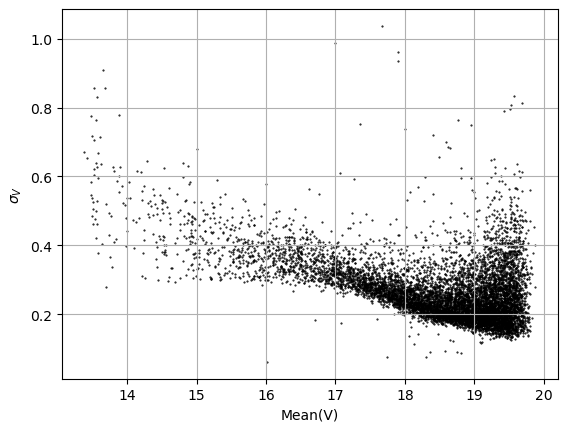

In [5]:
plt.scatter(prom, desv, c='k', s=0.25)
plt.xlabel('Mean(V)')
plt.ylabel(r'$\sigma_{V}$')
plt.grid()

In [5]:
mag_1 = mag[0:2873]
mag_2 = mag[2873:5744]
mag_3 = mag[5744:]

ids_1 = ids[0:2873]
ids_2 = ids[2873:5744]
ids_3 = ids[5744:]

def func_plotBox(x,i):
    
    data = [value for value in x if not np.isnan(value)]
    
    plt.boxplot(data)
    plt.ylabel('V')
    plt.title(f'ID_{int(i)}')
    pdf.savefig()
    plt.close()
    
with PdfPages('MagBoxDao_1.pdf') as pdf: 
    for i in tqdm(range(len(ids_1))):
        func_plotBox(mag_1[i], ids_1[i])

In [ ]:
with PdfPages('MagBoxDao_3.pdf') as pdf: 
    for i, magt in tqdm(enumerate(mag_3)):
        datos = [value for value in magt if not np.isnan(value)]
        if i%4 == 0:
            fig, axs = plt.subplots(2, 2, figsize=(10, 8))
            
        fila = i%2 #se decide si el plot estará arriba o abajo
        columna = (i // 2)%2
        
        axs[fila, columna].boxplot(datos)
        axs[fila, columna].invert_yaxis()
        axs[fila, columna].set_ylabel('V')
        axs[fila, columna].set_title(f'ID_{int(ids_3[i])}, i={i}')
        
        if (i+1) % 4==0 or (i+1)==len(mag_3):
            pdf.savefig(fig)
            plt.close(fig)

2592it [06:29,  7.25it/s]

In [4]:
def elimatp(mag, merr, time):
    
    data = [value for value in mag if not np.isnan(value)]
    boxplot = plt.boxplot([data], flierprops = dict(markerfacecolor='red', marker='o'))
    atpos = [item.get_ydata() for item in boxplot['fliers']]

    magt = []
    merrt = []
    timet = []
    for i in range(len(mag)):
        if mag[i] not in atpos[0]:
            magt.append(mag[i])
            merrt.append(merr[i])
            timet.append(time[i])
    magt = np.array(magt)
    merrt = np.array(merrt)
    timet = np.array(timet)
    return magt, merrt, timet

100%|███████████████████████████████████████| 8618/8618 [03:28<00:00, 41.41it/s]


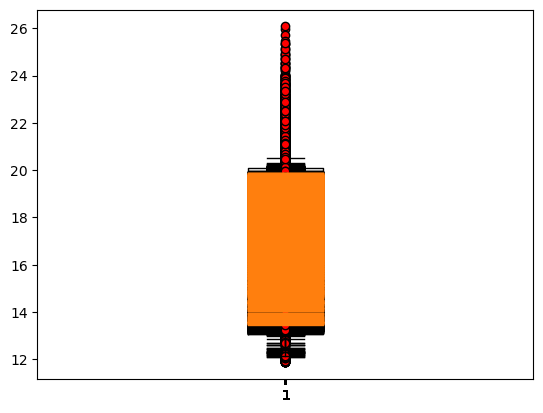

In [5]:
mag1 = []
merr1 = []
ids1 = []
time1 = []
for i in tqdm(range(len(mag))):
    magt, merrt, timet = elimatp(mag[i], merr[i], time)
    len_sin_nan = np.count_nonzero(~np.isnan(magt))
    if len_sin_nan >= 63:
        mag1.append(magt)
        merr1.append(merrt)
        ids1.append(ids[i])
        time1.append(timet)
plt.close()

In [7]:
with open("mag_1.pickle", "wb") as f:
    pickle.dump(mag1, f)
with open("merr_1.pickle", "wb") as f:
    pickle.dump(merr1, f)
with open("ids_1.pickle", "wb") as f:
    pickle.dump(ids1, f)
with open("time_1.pickle", "wb") as f:
    pickle.dump(ids1, f)

In [3]:
with open("mag_1.pickle", "rb") as f:
    mag1 = pickle.load(f)
with open("merr_1.pickle", "rb") as f:
    merr1 = pickle.load(f)
with open("ids_1.pickle", "rb") as f:
    ids1 = pickle.load(f)
with open("time_1.pickle", "rb") as f:
    time1 = pickle.load(f)

In [8]:
desv1 = []
prom1 = []
for i in tqdm(range(len(mag1))):
    prom1.append(np.nanmean(mag1[i]))
    desv1.append(np.nanstd(mag1[i]))

100%|█████████████████████████████████████| 8618/8618 [00:03<00:00, 2494.40it/s]


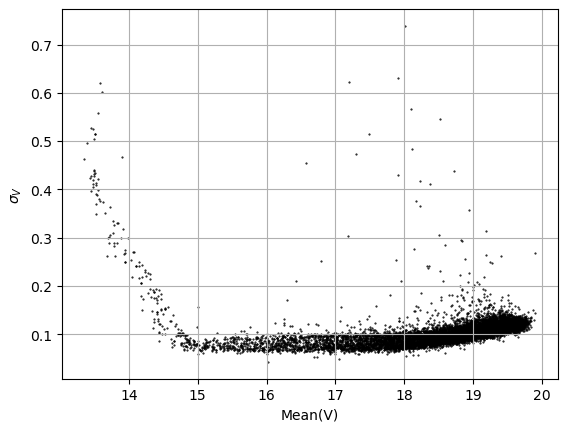

In [12]:
plt.scatter(prom1, desv1, c='k', s=0.25)
plt.xlabel('Mean(V)')
plt.ylabel(r'$\sigma_{V}$')
plt.grid()

In [9]:
(def filtrar15mag(mag, merr, ids, prom, desv, time):
    
    magt = []
    merrt = []
    idst = []
    promt = []
    desvt = []
    timet = []
    
    for i in tqdm(range(len(prom))):
        if (prom[i]>=15):
            ma)gt.append(mag[i])
            merrt.append(merr[i])
            idst.append(ids[i])
            promt.append(prom[i])
            desvt.append(desv[i])
            timet.append(time[i])
            
        
    return magt, merrt, idst, promt, desvt, timet

In [10]:
mag2, merr2, ids2, prom2, desv2, time2 = filtrar15mag(mag1, merr1, ids1, prom1, desv1, time1)

100%|████████████████████████████████████| 8618/8618 [00:00<00:00, 11175.41it/s]


In [30]:
ids2.index(6108.0)
print(mag2[3622])

[16.571 16.479 16.501 16.408 16.507 16.57  16.502    nan    nan 16.531
    nan    nan    nan 16.534 16.54  16.521 16.438 16.398    nan 16.531
 16.488    nan    nan 16.528 16.519 16.412    nan 16.523 16.496 16.544
 16.519 16.408    nan 16.593 16.537 16.491 16.52  16.506 16.544 16.493
    nan 16.479 16.479 16.48  16.508 16.483 16.492 16.501 16.499 16.546
    nan    nan 16.569 16.473 16.578    nan    nan 16.577 16.425 16.501
 16.45     nan 16.522 16.496 16.519 16.616 16.705 16.543 16.542 16.539
 16.525    nan 16.468 16.547 16.507    nan    nan 16.566    nan    nan
    nan    nan 16.547 16.516    nan 16.524    nan 16.563 16.523    nan
    nan 16.451 16.505 16.502 16.543 16.578 16.854    nan 16.572    nan
 16.539    nan 16.494 16.582 16.495 16.498    nan 16.561 16.491    nan
 16.5   16.517 16.543 16.507 16.487 16.516 16.513 16.448    nan 16.505
 16.527    nan 16.455    nan    nan 16.492 16.589 16.533 16.433 16.473
    nan 16.539 16.523 16.516 16.566 16.523 16.535 16.542 16.51     nan
    na

In [15]:
with open("mag_2.pickle", "wb") as f:
    pickle.dump(mag2, f)
with open("merr_2.pickle", "wb") as f:
    pickle.dump(merr2, f)
with open("ids_2.pickle", "wb") as f:
    pickle.dump(ids2, f)
with open("time_2.pickle", "wb") as f:
    pickle.dump(time2, f)
with open("prom_2.pickle", "wb") as f:
    pickle.dump(prom2, f)
with open("desv_2.pickle", "wb") as f:
    pickle.dump(desv2, f)

In [37]:
with open("mag_2.pickle", "rb") as f:
    mag2 = pickle.load(f)
with open("merr_2.pickle", "rb") as f:
    merr2 = pickle.load(f)
with open("ids_2.pickle", "rb") as f:
    ids2 = pickle.load(f)
with open("time_2.pickle", "rb") as f:
    time2 = pickle.load(f)
with open("prom_2.pickle", "rb") as f:
    prom2 = pickle.load(f)
with open("desv_2.pickle", "rb") as f:
    desv2 = pickle.load(f)

In [38]:
def func(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d
popt, pcov = curve_fit(func, prom2, desv2)
a, b, c, d = popt

In [39]:
fit = 1.2*func(np.array(prom2), a, b, c, d)

Text(0, 0.5, '$\\sigma_{promV}$')

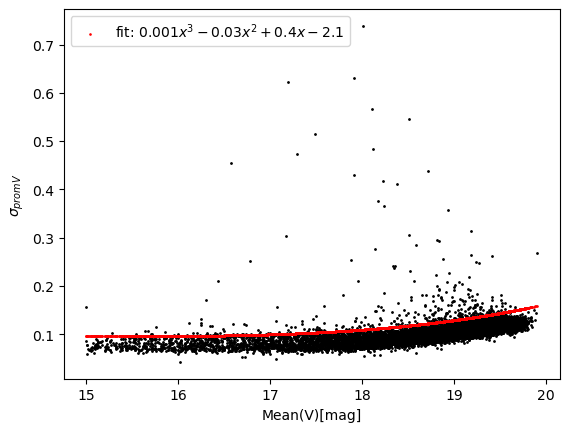

In [114]:
plt.scatter(prom2, desv2, s=1, c='k')
plt.scatter(prom2,1.2*func(np.array(prom2), a, b, c, d), s=0.8, c='r', label=r'fit: $0.001x^3 - 0.03x^2 + 0.4x-2.1$')
plt.legend()
plt.xlabel(r'Mean(V)[mag]')
plt.ylabel(r'$\sigma_{promV}$')

In [40]:
def filtrarfit(fit, mag, merr, ids, prom, desv, time):
    magt = []
    merrt = []
    idst = []
    promt = []
    desvt = []
    timet = []
    for i in tqdm(range(len(prom))):
        if (desv[i] > fit[i]):
            magt.append(mag[i])
            merrt.append(merr[i])
            idst.append(ids[i])
            promt.append(prom[i])
            desvt.append(desv[i])
            timet.append(time[i])
            
        
    return magt, merrt, idst, promt, desvt, timet    

In [41]:
mag3, merr3, ids3, prom3, desv3, time3 = filtrarfit(fit, mag2, merr2, ids2, prom2, desv2, time2) 

100%|███████████████████████████████████| 8422/8422 [00:00<00:00, 169190.45it/s]


Text(0, 0.5, '$\\sigma_{promV}$')

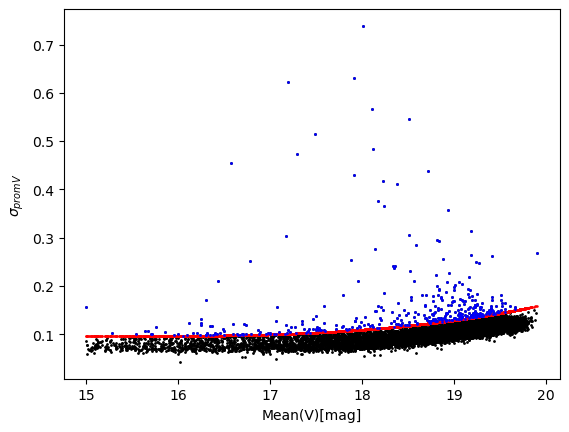

In [133]:
plt.scatter(prom2, desv2, s=1, c='k')
plt.scatter(prom2,1.2*func(np.array(prom2), a, b, c, d), s=0.6, c='r')
plt.scatter(prom3, desv3, s=1, c='b')
plt.xlabel(r'Mean(V)[mag]')
plt.ylabel(r'$\sigma_{promV}$')

In [42]:
with open("mag_3.pickle", "wb") as f:
    pickle.dump(mag3, f)
with open("merr_3.pickle", "wb") as f:
    pickle.dump(merr3, f)
with open("ids_3.pickle", "wb") as f:
    pickle.dump(ids3, f)
with open("time_3.pickle", "wb") as f:
    pickle.dump(time3, f)
with open("prom_3.pickle", "wb") as f:
    pickle.dump(prom3, f)
with open("desv_3.pickle", "wb") as f:
    pickle.dump(desv3, f)

In [43]:
with open("mag_3.pickle", "rb") as f:
    mag3 = pickle.load(f)
with open("merr_3.pickle", "rb") as f:
    merr3 = pickle.load(f)
with open("ids_3.pickle", "rb") as f:
    ids3 = pickle.load(f)
with open("time_3.pickle", "rb") as f:
    time3 = pickle.load(f)
with open("prom_3.pickle", "rb") as f:
    prom3 = pickle.load(f)
with open("desv_3.pickle", "rb") as f:
    desv3 = pickle.load(f)

In [47]:
ids3.index(6108)
mag3[141]

array([16.571, 16.479, 16.501, 16.408, 16.507, 16.57 , 16.502,    nan,
          nan, 16.531,    nan,    nan,    nan, 16.534, 16.54 , 16.521,
       16.438, 16.398,    nan, 16.531, 16.488,    nan,    nan, 16.528,
       16.519, 16.412,    nan, 16.523, 16.496, 16.544, 16.519, 16.408,
          nan, 16.593, 16.537, 16.491, 16.52 , 16.506, 16.544, 16.493,
          nan, 16.479, 16.479, 16.48 , 16.508, 16.483, 16.492, 16.501,
       16.499, 16.546,    nan,    nan, 16.569, 16.473, 16.578,    nan,
          nan, 16.577, 16.425, 16.501, 16.45 ,    nan, 16.522, 16.496,
       16.519, 16.616, 16.705, 16.543, 16.542, 16.539, 16.525,    nan,
       16.468, 16.547, 16.507,    nan,    nan, 16.566,    nan,    nan,
          nan,    nan, 16.547, 16.516,    nan, 16.524,    nan, 16.563,
       16.523,    nan,    nan, 16.451, 16.505, 16.502, 16.543, 16.578,
       16.854,    nan, 16.572,    nan, 16.539,    nan, 16.494, 16.582,
       16.495, 16.498,    nan, 16.561, 16.491,    nan, 16.5  , 16.517,
      

In [ ]:
def datasinnan(mag, merr, time):
    magt = []
    merrt = []
    timet = []
    for i in range(len(mag)):
        if (np.isnan(mag[i]) == False) and (np.isnan(time[i]) == False):
            timet.append(time[i])
            magt.append(mag[i])
            merrt.append(merr[i])
           
    return magt, merrt, timet

In [8]:
time4 = []
mag4 = []
merr4 = []
ids4 = ids3
prom4 = prom3
desv4= desv3

for i in tqdm(range(len(mag3))):
    magt, merrt, timet = datasinnan(mag3[i], merr3[i], time3[i])
    time4.append(np.array(timet))
    mag4.append(np.array(magt))
    merr4.append(np.array(merrt))

100%|████████████████████████████████████████| 388/388 [00:02<00:00, 154.07it/s]


In [9]:
with open("mag_4.pickle", "wb") as f:
    pickle.dump(mag4, f)
with open("merr_4.pickle", "wb") as f:
    pickle.dump(merr4, f)
with open("ids_4.pickle", "wb") as f:
    pickle.dump(ids4, f)
with open("time_4.pickle", "wb") as f:
    pickle.dump(time4, f)
with open("prom_4.pickle", "wb") as f:
    pickle.dump(prom4, f)
with open("desv_4.pickle", "wb") as f:
    pickle.dump(desv4, f)

In [4]:
with open("mag_4.pickle", "rb") as f:
    mag4 = pickle.load(f)
with open("merr_4.pickle", "rb") as f:
    merr4 = pickle.load(f)
with open("ids_4.pickle", "rb") as f:
    ids4 = pickle.load(f)
with open("time_4.pickle", "rb") as f:
    time4 = pickle.load(f)
with open("prom_4.pickle", "rb") as f:
    prom4 = pickle.load(f)
with open("desv_4.pickle", "rb") as f:
    desv4 = pickle.load(f)

In [13]:
with PdfPages('magTdaoSet4.pdf') as pdf: 
    for i in tqdm(range(len(mag4))): 
        plt.scatter(time4[i], mag4[i], c='k', s=0.8) 
        plt.gca().invert_yaxis()
        plt.xlabel('HJD')
        plt.ylabel('V')
        plt.title( f'ID_{ids4[i]}, i={i}') 
        pdf.savefig()
        plt.close()

100%|█████████████████████████████████████████| 388/388 [01:28<00:00,  4.36it/s]


In [16]:
#funciones para Lombscargle
def darfase(T, t0, P):
    f = np.zeros(len(T))
    i = 0
    for t in T:
        if np.isnan(t)==True:
            t = 0
        a = (t - t0)/P
        b = int((t - t0)/P)
        f[i] = a-b
        i+=1
    return f

def darfrec(t):
    fmax = 1/(1.1/24)
    fmin = 1/9.9
    
    return fmin, fmax

def darDatos(t, t0, m, merr):
    
    fmin, fmax = darfrec(t)
    
    ls = LombScargle(t, m, merr)
    f, pw = ls.autopower(minimum_frequency=fmin, maximum_frequency=fmax)
    
    s95 = ls.false_alarm_level(0.05)
    s99 = ls.false_alarm_level(0.01)
    pwarr = np.sort(pw)
    pint = pwarr[-5:]
    ub = np.where(np.isin(pw, pint))[0]
    fmax = f[ub]
    p = 1/fmax
    Fase=[]
    for i in range(len(p)):
        Fase.append(darfase(t, 0, p[i]))
    
    return pw, f, Fase, p, s95, s99

In [17]:
pw = []
fases = []
fre = []
p = []
s95 = []
s99 = []

for i in tqdm(range(len(mag4))):
    pw1, fre1, fase1,  p1, s951, s991 = darDatos(time4[i], 0, mag4[i], merr4[i])
    pw.append(pw1)
    fases.append(fase1)
    fre.append(fre1)
    p.append(p1)
    s95.append(s951)
    s99.append(s991)   

100%|█████████████████████████████████████████| 388/388 [00:22<00:00, 16.88it/s]


In [18]:
with open("pw.pickle", "wb") as f:
    pickle.dump(pw, f)
with open("fases.pickle", "wb") as f:
    pickle.dump(fases, f)
with open("fre.pickle", "wb") as f:
    pickle.dump(fre, f)
with open("period.pickle", "wb") as f:
    pickle.dump(p, f)
with open("sig95.pickle", "wb") as f:
    pickle.dump(s95, f)
with open("sig99.pickle", "wb") as f:
    pickle.dump(s99, f)

In [5]:
with open("pw.pickle", "rb") as f:
    pw = pickle.load(f)
with open("fases.pickle", "rb") as f:
    fases = pickle.load(f)
with open("fre.pickle", "rb") as f:
    fre = pickle.load(f)
with open("period.pickle", "rb") as f:
    p = pickle.load(f)
with open("sig95.pickle", "rb") as f:
    s95 = pickle.load(f)
with open("sig99.pickle", "rb") as f:
    s99 = pickle.load(f)

In [ ]:
with PdfPages('curvasDao.pdf') as pdf: 
    for i in tqdm(range(len(mag4))):
        for j in range(len(fases[i])):
            for k in [-1, 0, 1]:
                plt.scatter(fases[i][j]+k, mag4[i], marker = ".", color = "darkred")
                
            plt.gca().invert_yaxis()
            plt.xlabel('Fase')
            plt.ylabel('V') 
            plt.title( f'ID_{ids4[i]}, i={i}, Periodo = {round(p[i][j], 3)}[d]') 
            pdf.savefig()
            plt.close()

In [ ]:
with PdfPages('CurvasDao.pdf') as pdf:
    for i in tqdm(range(len(mag4))):
        fig, axs = plt.subplots(2, 3, figsize=(10,6))
        
        axs[0, 0].plot(fre[i], pw[i], c='k', linewidth=0.5)
        axs[0, 0].set_title( f'ID_{ids4[i]}, i={i}')
        axs[0, 0].set_xlabel('Frequency')
        axs[0, 0].set_ylabel('Power')
        axs[0, 0].axhline(s95[i], color='r', linestyle='--', label='FAL = 0.05')
        axs[0, 0].axhline(s99[i], color='b', linestyle='--',  label='FAL = 0.01')
        axs[0, 0].legend()
        
        for j, periodo in enumerate(p[i]):
            if j<2:
                for k in [-1, 0, 1]:
                    axs[0, j+1].scatter(fases[i][j]+k, mag4[i], s=1, c="darkred")
                axs[0, j+1].invert_yaxis()
                axs[0, j+1].set_xlabel('Fase')
                axs[0, j+1].set_ylabel('V')
                axs[0, j+1].set_title(f'Periodo={round(p[i][j], 3)}[d]')
            else:
                for k in [-1, 0, 1]:
                    axs[1, j-2].scatter(fases[i][j]+k, mag4[i], s=1, c="darkred")
                axs[1, j-2].invert_yaxis()
                axs[1, j-2].set_xlabel('Fase')
                axs[1, j-2].set_ylabel('V')
                axs[1, j-2].set_title(f'Periodo={round(p[i][j], 3)}[d]')
        
        plt.tight_layout()
        pdf.savefig()
        plt.close()
            

 77%|███████████████████████████████▍         | 297/388 [10:31<04:12,  2.78s/it]

In [7]:
p[0]

array([0.4471105 , 0.31839078, 0.30900308, 0.24152112, 0.23608047])